Correlation plot for ATAC and methylation data

In [1]:
library(tidyverse)
library(ggplot2)

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang
Registered S3 method overwritten by 'rvest':
  method            from
  read_xml.response xml2
── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 3.1.1     ✔ purrr   0.3.4
✔ tibble  3.1.4     ✔ dplyr   1.0.7
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.4.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


In [2]:
meth_df <- readRDS("../data/methylation/methylation_preprocessed_FILTERED.rds")
colnames(meth_df) <- c("bin", "Methylation")

ATAC_data <- read.table("../data/ATACseq_250kb_bins.txt")
colnames(ATAC_data) = c("bin", "ATAC")
ATAC_data$ATAC = as.character(ATAC_data$ATAC)
ATAC_data$ATAC = as.numeric(ATAC_data$ATAC)
head(ATAC_data)
str(ATAC_data)

Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”

bin,ATAC
chr1_0,0.05376791
chr10_0,0.29698782
chr10_1,0.40893151
chr10_10,0.30582283
chr10_100,0.59316570
chr10_101,0.47641373


'data.frame':	11515 obs. of  2 variables:
 $ bin : Factor w/ 11515 levels "chr1_0","chr1_1",..: 1 998 999 1000 1001 1002 1003 1004 1005 1006 ...
 $ ATAC: num  0.0538 0.297 0.4089 0.3058 0.5932 ...


In [3]:
head(ATAC_data)
dim(ATAC_data)

bin,ATAC
chr1_0,0.05376791
chr10_0,0.29698782
chr10_1,0.40893151
chr10_10,0.30582283
chr10_100,0.59316570
chr10_101,0.47641373


[1] 11515     2

In [4]:
head(meth_df)
dim(meth_df)

bin,Methylation
chr1_3,50.85448
chr1_4,59.94958
chr1_5,66.37292
chr1_7,54.63748
chr1_8,67.25908
chr1_9,52.50686


[1] 10019     2

In [5]:
data <- dplyr::inner_join(ATAC_data,meth_df, by = "bin")

In [6]:
head(data)

bin,ATAC,Methylation
chr10_1,0.4089315,69.28076
chr10_10,0.3058228,36.89330
chr10_100,0.5931657,58.66910
chr10_101,0.4764137,42.84426
chr10_102,0.2862775,32.69127
chr10_103,0.3169988,33.14599


In [7]:
dim(data)

[1] 10019     3

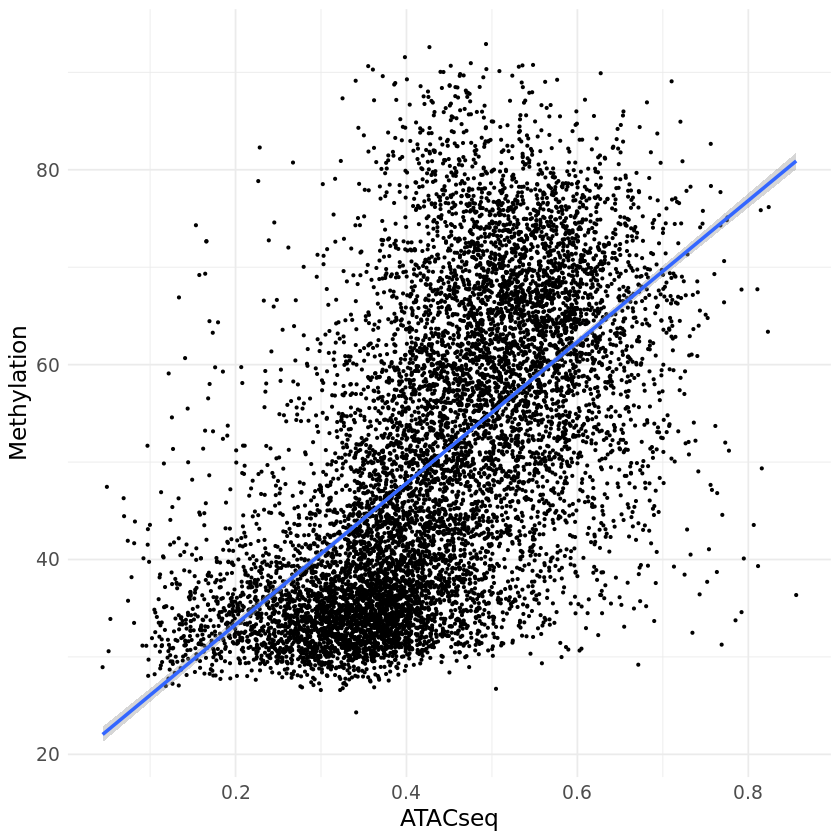

In [19]:


p <- ggplot(data, aes(x = ATAC, y = Methylation)) + 
    geom_point(size = 0.5) + 
    geom_smooth(method = "lm", formula = y~x) + theme_minimal() + theme(text = element_text(size = 14)) + xlab("ATACseq")

print(p)

In [20]:
png("../Plots_for_the_project_report/ATAC_and_Meth_correlation.png")
print(p)
dev.off()

png 
  2

In [18]:
cor(data$ATAC, data$Methylation)

[1] 0.5926526